In [1]:
import pandas as pd
import numpy as np
import datetime

df = pd.read_csv('AirQualityUCI.csv',sep=';')
df = df.dropna(axis=0, how='all')


df['dayweek']=[datetime.datetime(int(df['Date'][i].split('/')[2]), 
                  int(df['Date'][i].split('/')[1]), 
                  int(df['Date'][i].split('/')[0]),
                  12, 30, 0, 0).weekday() for i in range(len(df))]

In [2]:
df['we']=[(df['dayweek'][i]==5 or df['dayweek'][i]==6 ) for i in range(len(df))]


In [3]:
pt=df[['Date','Time','PT08.S1(CO)','we']]
pt.columns=['Date','Time','PT',"we"]
pt['Time']=[int(df['Time'][i][:2]) for i in range(len(df))]
pt = pt[6:9342].reset_index().drop(['index'], axis=1)
pt.head()

/home/gambit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Time,PT,we
0,11/03/2004,0,1185.0,False
1,11/03/2004,1,1136.0,False
2,11/03/2004,2,1094.0,False
3,11/03/2004,3,1010.0,False
4,11/03/2004,4,1011.0,False


In [4]:
ts=pd.DataFrame(pt["PT"][0:24])
ts.columns = ['0']
for i in range(388):
    i=i+1
    ts[str(i)]=[i for i in pt["PT"][24*i:24*(i+1)]]

ts = ts.T
ts['we']=[pt['we'][24*i] for i in range(len(ts))]

ts.T.head()

,0,1,2,3,4,5,6,7,8,9,...,379,380,381,382,383,384,385,386,387,388
0,1185,1080,1280,1534,1239,1304,1205,1371,1287,1127,...,1320,1372,1166,1106,1078,1024,1013,848,965,929
1,1136,1044,1196,1484,1239,1074,1072,1161,1134,1090,...,1205,1312,1079,1031,963,938,998,818,838,951
2,1094,988,1184,1367,1224,968,998,1064,999,1017,...,1099,1205,1008,1015,923,905,923,848,835,938
3,1010,889,1172,1344,1078,929,933,970,961,997,...,1106,1167,1034,1003,853,826,904,826,820,921
4,1011,831,1147,1130,1078,941,883,954,934,945,...,1099,1122,1001,951,883,879,884,818,815,850


In [5]:
ts=ts.T
giorniNO=[]
giorniFIX=[]

for i in range(len(ts.columns)):
    nulli=sum(ts[ts.columns[i]]<0)
    if nulli>0:
       # print("il giorno n."+str(ts.columns[i])+" ha nulli "+str(nulli))
        if nulli>2:
            giorniNO.append(ts.columns[i])
        else:
            giorniFIX.append(ts.columns[i])
            
print(giorniNO)

['21', '29', '75', '76', '100', '101', '102', '151', '168', '169', '170', '181', '278', '279', '280', '281', '288', '297', '298', '299', '323', '334', '335', '336', '337']


In [6]:
tempifix=[float(i) for i in pt['PT']]

for i in range(len(tempifix)):
    if tempifix[i]==-200:
        p=i
        s=i
        while(tempifix[p]==-200):
            p=p-1
        while(tempifix[s]==-200):
            s=s+1
        tempifix[i]=(tempifix[s]+tempifix[p])/2

ts=pd.DataFrame(tempifix[0:24])
ts.columns = ['0']
for i in range(388):
    i=i+1
    ts[str(i)]=[i for i in tempifix[24*i:24*(i+1)]]

ts = ts.T
ts['we']=[bool(pt['we'][24*i]) for i in range(len(ts))]  
ts = ts.T

ts=ts.drop(giorniNO, axis=1)
ts=ts.T
ts=ts.reset_index()
ts=ts.drop(['index'], axis=1)

ts.tail()


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,we
359,1024,938,905,826,879,901,948,1250,1263,1319,...,1070,1123,1271,1304,1360,1278,1130,1066,1090,False
360,1013,998,923,904,884,936,1068,1531,1184,1064,...,963,961,1067,1084,1102,976,895,886,886,False
361,848,818,848,826,818,868,901,1044,1030,965,...,897,939,943,928,961,867,823,835,893,False
362,965,838,835,820,815,842,884,922,903,899,...,900,910,947,947,936,925,885,891,904,True
363,929,951,938,921,850,811,848,882,936,1022,...,956,968,953,1015,1248,1180,1102,1116,1100,True


In [7]:
from tslearn.metrics import dtw as dtw

dist = dtw(ts.iloc[0][:24],ts.iloc[2][:24])
dist

771.495301346677

In [8]:
ts['m']=[sum(ts.iloc[i][8:10])/2 for i in range(len(ts))]
ts.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,we,m
0,1185,1136,1094,1010,1011,1066,1052,1144,1333,1351,...,1292,1383,1581,1776,1640,1313,965,913,False,1342.0
1,1080,1044,988,889,831,847,927,1091,1587,1545,...,1309,1274,1510,1525,1843,1598,1484,1677,False,1566.0
2,1280,1196,1184,1172,1147,978,1100,1112,1336,1408,...,1306,1326,1473,1609,1611,1621,1444,1418,True,1372.0
3,1534,1484,1367,1344,1130,1062,1076,1028,1155,1235,...,1458,1438,1478,1808,1898,1560,1324,1349,True,1195.0
4,1239,1239,1224,1078,1078,1075,1157,1314,1797,1961,...,1318,1445,1917,2040,1895,1595,1439,1142,False,1879.0


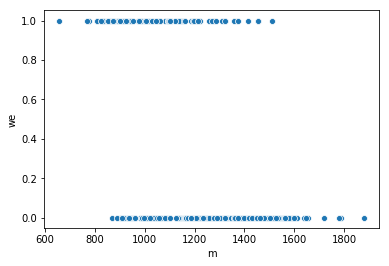

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(ts['m'],ts['we'])

In [11]:
boh = ts.iloc[:,:25]
boh['we']=[(0,1)[boh['we'][i]] for i in range(len(boh['we']))]
#boh=boh.iloc[180:200,:26].astype(float)
#boh=boh.iloc[:,8:9].astype(float)
#plt.matshow(boh, interpolation=None, aspect='auto')

In [12]:
from matplotlib.pyplot import figure
import seaborn as sns

x = np.arange(len(boh))
y = boh.iloc[:,8:9].astype(float)
data=pd.DataFrame()
data['x']=x
data['y']=y


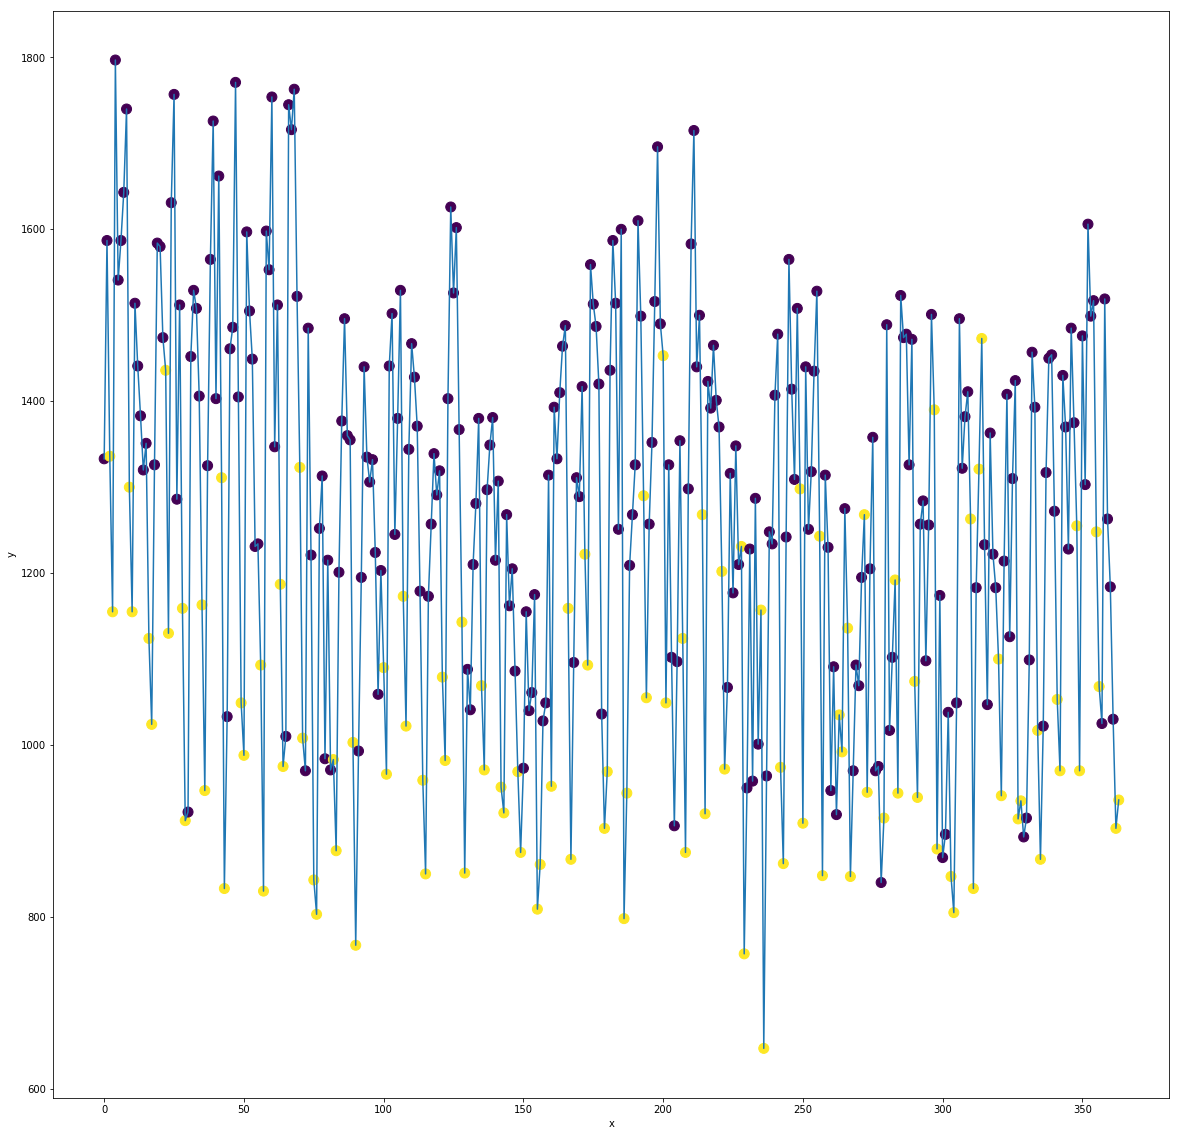

In [13]:


plt.figure(figsize=(20,20))

plt.scatter(x,y, c=boh['we'],s=100)
sns.lineplot(x='x',y='y',data=data)
plt.show()

In [14]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

iplot([go.Scatter(x=list(x), y=list(y.T.values[0]), mode = 'lines+markers',
                 marker=dict(
        color = boh['we'], 
        colorscale='Viridis',
        showscale=True  ))])

ZeroDivisionError: division by zero

# KNN

In [14]:
import numpy
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.neighbors import KNeighborsTimeSeriesClassifier, KNeighborsTimeSeries
from tslearn.piecewise import SymbolicAggregateApproximation

In [15]:
ts.head()

train = ts[:300]
test = ts[300:]

#la valutazione è fatta solo su test usando confronto su train

x_train = train.drop(['we','m'], axis=1)
y_train = train['we']

x_test = test.drop(['we','m'], axis=1)
y_test = test['we']

x_train = np.array(x_train)
x_test = np.array(x_test)

In [16]:
x_test.shape

(64, 24)

In [17]:
x_test=x_test.reshape(64,24,1)

In [18]:
# Nearest neighbor searach

k=5
knn = KNeighborsTimeSeries(n_neighbors=k, metric="dtw")
knn.fit(x_train, y_train)


KNeighborsTimeSeries(metric=<function cdist_dtw at 0x7f1ef39299d8>,
           metric_params=None, n_neighbors=5)

In [19]:

dists, ind = knn.kneighbors(x_test)
print("1. Nearest neighbour search")
print("Computed nearest neighbor indices (wrt DTW)\n", ind)


1. Nearest neighbour search
Computed nearest neighbor indices (wrt DTW)
 [[262 204  72  91 277]
 [204 277  91  72 150]
 [277 131  30  72 178]
 [155 204 277  91  72]
 [155  83 148 157 150]
 [170 190 295 209 189]
 [240  24 285 228 264]
 [125 279  62 165 112]
 [  9 192 210  21 198]
 [ 15 177 134  37 141]
 [128 146 159 207 139]
 [148 276 131 157  29]
 [168 130 153 151 270]
 [272 212 245   3   2]
 [201  71 297 249  49]
 [ 82  37 146 141 119]
 [143 158 179 100 263]
 [279 260 125  62 221]
 [274  17 145 166 137]
 [ 89 172  16  97 169]
 [ 98  28  35 260 250]
 [129 128 298 291 108]
 [194 252  14 171 219]
 [275  12 177 161 171]
 [130 168  79 121 270]
 [282 123  61  87 170]
 [ 62 124 127 126 110]
 [ 57 136 160 298 122]
 [291 294 108 207 167]
 [155  90  76 149  72]
 [237  91 204 149  72]
 [ 44 232 205 242  84]
 [125 290 210 112 260]
 [106 264 240 221  50]
 [122 121 136 281  57]
 [129 294 207 257 291]
 [143  79 130  44 158]
 [164 295  14  86 163]
 [210  24 289 174   9]
 [ 15 177  62 110  37]
 [183 1

In [41]:
import math

y_pred = [math.floor((sum([ts.iloc[i]['we'] for i in ind[k]])/5)+0.5)==1 for k in range(len(ind))]


In [51]:
accuracy_score(y_pred,list(y_test))

0.859375

In [53]:
cm = confusion_matrix(list(y_test), y_pred)
cm


array([[39,  5],
       [ 4, 16]])

# metodi con serie come variabili

# ANN

In [61]:

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV


y=[int(i) for i in ts['we']]
x = ts.drop(['we'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)



In [62]:
%%time

mlp = MLPClassifier()


parameter_space = {
    'hidden_layer_sizes': [ (50,100,50), (50,100,200,100,50), (100,200,400,200,100),(200,400,800,400,200)],
    'activation': ['relu'],
    'solver': [ 'adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
}


clf = GridSearchCV(mlp, parameter_space, scoring="recall")

clf.fit(x_train, y_train)

/home/gambit/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/gambit/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gambit/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 38.7 s, sys: 17.8 s, total: 56.5 s
Wall time: 14.6 s


In [63]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [263]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.577 (+/-0.251) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.500 (+/-0.724) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 48, 24), 'learning_rate': 'constant', 'solver': 'adam'}
0.564 (+/-0.714) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 200, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.641 (+/-0.404) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 200, 400, 200, 100), 'learning_rate': 'constant', 'solver': 'adam'}


In [64]:
y_pred_train, y_pred_test = clf.predict(x_train) , clf.predict(x_test)

from sklearn.metrics import classification_report

print('Results on the test set:')
print(classification_report(y_train, y_pred_train))


Results on the test set:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       195
           1       0.74      0.92      0.82        78

   micro avg       0.89      0.89      0.89       273
   macro avg       0.85      0.90      0.87       273
weighted avg       0.90      0.89      0.89       273



In [65]:
print("     TRAIN\n")
print("accuracy")
print(accuracy_score(y_train, y_pred_train))
print("\nmatrix")
print(confusion_matrix(y_train, y_pred_train))

print("\n     TEST\n")
print("accuracy")
print(accuracy_score(y_test, y_pred_test))
print("\nmatrix")
print(confusion_matrix(y_test, y_pred_test))

     TRAIN

accuracy
0.8864468864468864

matrix
[[170  25]
 [  6  72]]

     TEST

accuracy
0.8351648351648352

matrix
[[52  9]
 [ 6 24]]


In [ ]:
#LE DUE CATEGORIE NON SONO EQUIVALENTI, NWE>>WE,QUINDI L ACCURACY NON BASTA MA DOBBIAMO VEDERE QUANTI SONO GLI ERRORI SUI WE

In [67]:
5/7

0.7142857142857143

In [242]:
accuracy_score([0]*len(y_train),y_train)

0.7142857142857143

In [246]:
confusion_matrix([0]*len(y_train),y_train)

array([[195,  78],
       [  0,   0]])

In [245]:
y_fake = np.array([0]*len(y_train))
print(classification_report([0]*len(y_train),y_train))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83       273
           1       0.00      0.00      0.00         0

   micro avg       0.71      0.71      0.71       273
   macro avg       0.50      0.36      0.42       273
weighted avg       1.00      0.71      0.83       273



/home/gambit/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/gambit/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/gambit/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:



from sklearn import tree
y=[int(i) for i in ts['we']]
x = ts.drop(['we'], axis=1)
x = x[[8]]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)


import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree") 


dot_data = tree.export_graphviz(clf,filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph 

confusion_matrix(clf.predict(x),y)